<a href="https://colab.research.google.com/github/Nastya880/cuda/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №1**

**Основы работы с технологией CUDA. Гибридное программирование. Работа с глобальной памятью**


Контрольные вопросы

1.	Что такое гибридное программирование?

```
Гибридное программирование - это написание программы для гетерогенной
аппаратной вычислительной структуры, например, для системы, состоящей
из центрального процессора CPU и графического ускорителя GPU.
```

2.	Что такое CUDA?


```
CUDA (Compute Unified Device Architecture) – 
- технология (библиотеки и расширенный Cи), предназначенная для разработки
приложений для массивно-параллельных вычислительных устройств, заметно облегчает
написание GPGPU (General Purposed Graphical Processing Unit)-приложений;
- программно-аппаратная архитектура.

```


3.	Основные положения программной модели CUDA? 


```
GPU (Graphical Processing Unit, device) – это вычислительное устройство,
которое:
-	состоит из массива потоковых мультипроцессоров (streaming 
     multiprocessor, SM);
-	является сопроцессором к центральному процессору CPU (host);
-	имеет собственную память (DRAM);
-	выполняет одновременно большое количество нитей.

```


4.	Из чего состоит программный стек CUDA?


```
CPU (Application -> CUDA Libraries, CUDA RunTime, CUDA Drver) -> GPU
```


5.	Что такое ядро в CUDA?


```
Ядро (kernel) – это функция, которая работает на GPU и которая 
может быть вызвана только с CPU. Ядро выполняется на сетке из блоков.
```


6.	Какие расширения языка Си вводятся в CUDA? 


```
Вводимые в CUDA расширения языка Си состоят из: 
-	спецификаторов функций, показывающих, где будет выполняться функция и откуда она может быть вызвана;  
-	спецификаторов переменных, задающих тип памяти, используемый для данных переменных;
-	 директивы для запуска ядра из кода;
-	встроенные переменные, содержащие информацию о текущей нити;
-	дополнительные типы данных.

```


7.	Какие встроенные переменные поддерживаются в CUDA и для чего они нужны?


```
В CUDA поддерживаются следующие встроенные переменные,
содержащие информацию о текущей нити (рисунок 3):
-	dim3  gridDim;  // размер сетки
-	uint3 blockIdx; // индекс текущего блока в сетке
-	dim3  blockDim; // размер блока 
-	uint3 threadIdx; // индекс текущей нити в блоке
-	int   warpSize; // размер warp’а
Встроенные переменные доступны в функции ядра.

```


8.	Какие ограничения вводятся на функции, выполняемые на GPU? 


```
- нельзя брать адрес функции (за исключением __global__);
-	не поддерживается рекурсия;
-	не поддерживаются static-переменные внутри функции;
-	не поддерживается переменное число входных аргументов.

```
9. МОЙ ДОП	Какие ограничения вводятся на спецификаторы переменных, выполняемые на GPU? 


```
-	нельзя применять к полям структуры (struct или union);
-	не могут быть extern;
-	запись в __constant__  может выполнять только CPU через специальные функции;
-	__shared__ - переменные не могут инициализироваться при объявлении.
```


**Задание 1. В MS Visual Studio создать проект CUDA VS Wizard. Ознакомиться и запустить программу «Hello world». Получить информацию об устройстве. Измерить время выполнения программы. Результаты занести в отчёт. Запустить программу «Hello world» на всех мультипроцессорах в GPU. Измерить время выполнения программы. Результаты занести в отчёт.**

In [ ]:
#include <cstdio>

__global__ void kernel()
{
}

int main()
{
    kernel << <1, 1 >> > ();
    printf("Hello, world!\n");
    return 0;
}

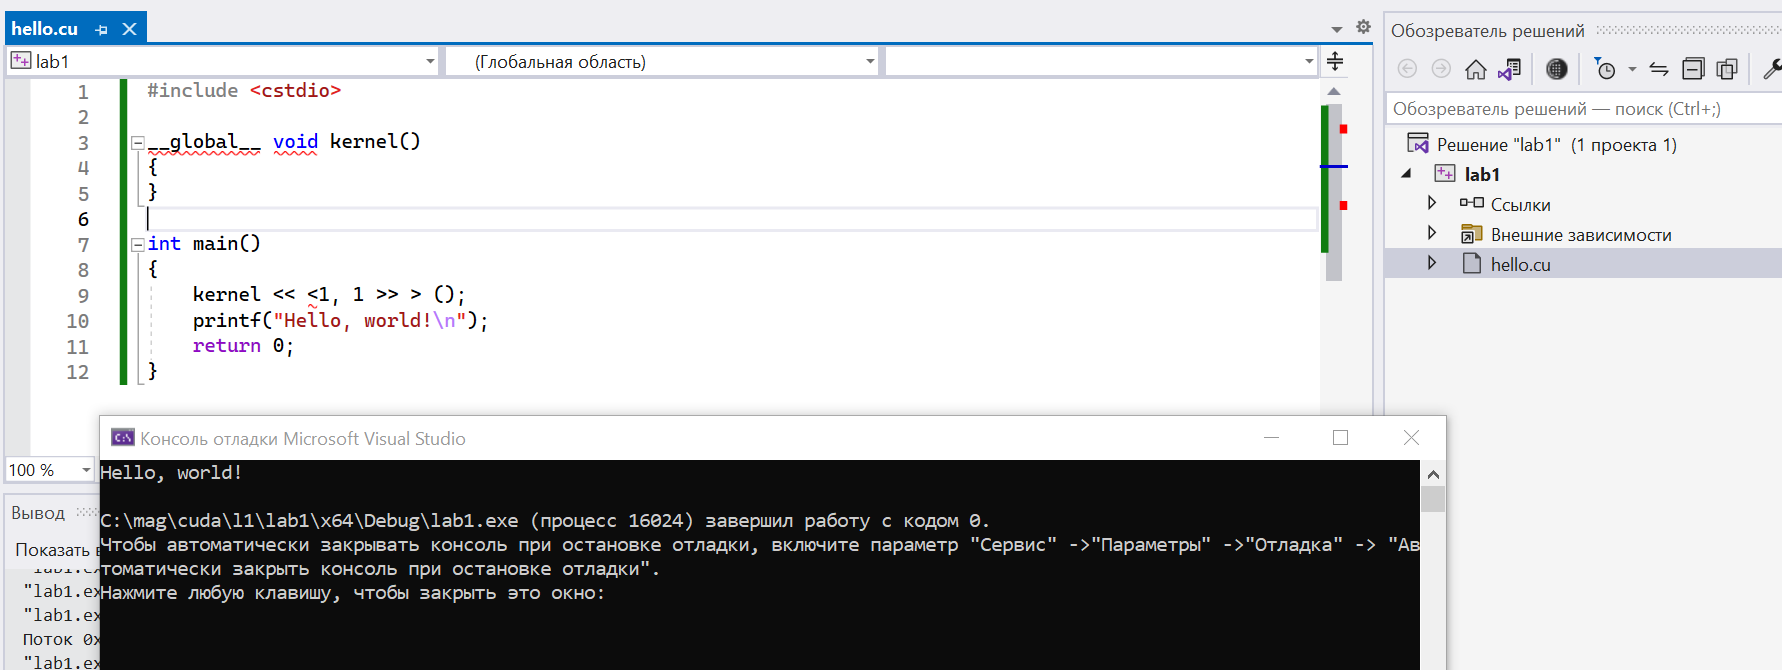

In [ ]:
#include <stdio.h>

// __global__ functions, or "kernels", execute on the device
__global__ void hello_kernel(void)
{
  printf("Hello, world from the device!\n");
}

int main(void)
{
  // greet from the host
  printf("Hello, world from the host!\n");

  // launch a kernel with a single thread to greet from the device
  hello_kernel<<<1,1>>>();

  // wait for the device to finish so that we see the message
  cudaDeviceSynchronize();

  return 0;
}

Hello, world from the host!

Hello, world from the device!

**Тройные угловые скобки ( <<< , >>> ) отмечают вызов из кода хоста на код устройства (также называемый «запуск ядра»). Числа в этих тройных скобках указывают количество раз для выполнения параллельно и количество потоков. **

Информация об устройстве:

In [ ]:
struct cudaDeviceProp
{
    char name[256];           //название устройства
    size_t totalGlobalMem;    //полный объем глобальной памяти в байтах
    size_t sharedMemPerBlock; //объем разделяемой памяти в блоке в байтах
    int regsPerBlock;         //кол-во 32битовых регистров в блоке
    int warpSize;             //размер warp
    size_t memPitch;          //макс pitch в байтах, допустимый функциями копирования
                              //памяти, выделенной через cudaMallocPitch

    int maxThreadsPerBlock;   //макс кол-во активных нитей в блоке
    int maxThreadsDim[3];     //макс размер блока
    int maxGridSize[3];       //макс размер сетки
    size_t totalConstMem;     //объем константной памяти
    int major;                //compute capability, старший номер
    int minor;                 //compute capability, младший номер
    int clockRate;            //частота в килогерцах
    size_t textureAlignment;  //выравнивание памяти для текстур
    int deviceOverlap;        //можно ли осуществлять копирование параллельно с вычислениями

    int multiProcessorCount;  //количетсво мультипроцессоров в GPU
    int kernelExecTimeOutEnables; //1, если есть ограничение на время выполнения ядра

    int integrated;           //1, если GPU встроено в материнскую плату
    int canMapHostMemory;     //1, если можно отбражать памяти CPU в куда для использования cudaHostAlloc, cudaHostGetDevicePointer

    int computeMode;          //режим, в котором находится GPU
                              // cudeComputeModeDefault
                              // cudaComputeModeExclusive - только одна нить, может вызвать cudaSetDevice для данного GPU
                              // cudaComputeModeProhibited - ни одна нить не может вызвать cudaSetDevice для данного GPU
}

In [ ]:
#include <cstdio>
#include <cuda_runtime.h>
#include <chrono>

int main (int argc, char * argv [] )
{
    int deviceCount;
    cudaDeviceProp devProp{};
    cudaGetDeviceCount ( &deviceCount );
    printf ( "Found %d devices\n", deviceCount );
    for ( int device = 0; device < deviceCount; device++)
    {cudaGetDeviceProperties ( &devProp, device );
        printf ("Device %d\n", device );
        printf ("Compute capability : %d.%d\n", devProp.major, devProp.minor);
        printf ("Name : %s\n", devProp.name);
        // Полный объем глобальной памяти в Mбайтах:
        printf ("Total Global Mem: %lu\n", (devProp.totalGlobalMem/(1024*1024)));
        printf ("Shared memory per block: %zu\n" , devProp.sharedMemPerBlock );
        printf ("Registers per block : %d\n", devProp.regsPerBlock);
        printf ("Warp size : %d\n", devProp.warpSize);
        printf ("Max threads per block: %d\n", devProp.maxThreadsPerBlock);
        printf ("Total constant memory: %zu\n", devProp.totalConstMem);
        printf ("Clock Rate : %d\n", devProp.clockRate);
        printf ("Texture Alignment : %zu\n", devProp.textureAlignment);
        printf ("Device Overlap : %d\n", devProp.deviceOverlap);
        printf ("Multiprocessor Count: %d\n", devProp.multiProcessorCount);
        printf ("Max Threads Dim : %d %d %d\n", devProp.maxThreadsDim[0],
                devProp.maxThreadsDim[1], devProp.maxThreadsDim[2] );
        printf ("Max Grid Size : %d %d %d\n", devProp.maxGridSize [0],
                devProp.maxGridSize [1], devProp.maxGridSize [2]);
        printf("");
    }
    return 0;
}

Found 1 devices

Device 0

Compute capability : 6.1

Name : GeForce GTX 1080 Ti

Total Global Mem: 11264

Shared memory per block: 49152

Registers per block : 65536

Warp size : 32

Max threads per block: 1024

Total constant memory: 65536

Clock Rate : 1708500

Texture Alignment : 512

Device Overlap : 1

Multiprocessor Count: 28

Max Threads Dim : 1024 1024 64

Max Grid Size : 2147483647 65535 65535

Для определения функции используется __global__ объявления __global__ . Эта функция будет вызываться каждым потоком. Если мы хотим, чтобы каждый поток обрабатывал элемент результирующего массива, нам нужно средство для выделения и идентификации каждого потока. CUDA определяет переменные blockDim , blockIdx и threadIdx . blockDim переменная blockDim содержит размеры каждого потока, как указано во втором параметре конфигурации выполнения для запуска ядра. threadIdx переменные threadIdx и blockIdx содержат индекс потока в его blockIdx блоке и блок потока в сетке, соответственно. Обратите внимание: поскольку мы потенциально запрашиваем еще один поток, чем элементы в массивах, нам нужно передать size чтобы гарантировать, что мы не получаем доступ к концу массива.

In [ ]:

#include <iostream>
#include <cuda_runtime.h>
#include <chrono>

constexpr const size_t N = 1024 * 1024;

__global__ void kernel()
{
}

void run_hello_world(dim3 grid_dim, dim3 block_dim) {
    float* a;
    float* dev = nullptr;

    a = (float*)malloc(N * sizeof(float));
    cudaMalloc((void**)&dev, N * sizeof(float));


    auto start = std::chrono::high_resolution_clock::now();
    kernel << <grid_dim, block_dim >> > (dev);
    auto end = std::chrono::high_resolution_clock::now();
    std::cout << std::chrono::duration_cast<std::chrono::nanoseconds>(end - start).count() << "ns\n";

    cudaMemcpy(a, dev, N * sizeof(float), cudaMemcpyDeviceToHost);
    cudaFree(dev);
    free(a);
}

int main(int argc, char* argv[]) {

    int deviceCount;
    cudaDeviceProp prop;

    std::cout << "Base GPU execution time: ";
    run_hello_world({ (N / 512),1 }, { 512, 1 });

    //    start = std::chrono::high_resolution_clock::now();
    std::cout << "Full GPU execution time: ";
    run_hello_world({ (N / prop.maxThreadsDim[0]),1 }, { (uint32_t)prop.maxThreadsDim[0], 1 });
    //    end = std::chrono::high_resolution_clock::now();
    //    std::cout << "Full GPU execution time: " << std::chrono::duration_cast<std::chrono::milliseconds>(end - start).count() << "ms\n";

    return 0;
}

**Задание 2 Написать программу на Cи с использованием CUDA runtime API в соответствии с вариантом задания. Измерить время работы программы для различных значений параметров. Результаты занести в отчёт. Написать программу для верификации результатов.**